In [1]:
#使用seaborn
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context("paper",font_scale=1.5,rc={'figure.dpi':800})
sns.set_style("ticks")   # 风格选择包括："white", "dark", "whitegrid", "darkgrid", "ticks"
sns.set_style({'font.sans-serif': ['SimHei', 'Calibri']})  #设置中文设定

from pandas import Series,DataFrame


import numpy as np
np.random.seed(10000)
import imp
import input_data_class

import os
import configparser
import argparse
import logging
import logging.config

from scipy.stats import entropy
import math
from sklearn.manifold import TSNE
from sklearn import metrics 

In [2]:
#paper imgs dir
paper_imgs_dir="paper_imgs/"

location dataset

load data

In [3]:
df = pd.DataFrame(columns=['attack','defense','budget',"accuracy","dataset"])

"""
2019-12-17 08:37:22,199 - api - DEBUG - evaluate attack=our defense=MemGuard
2019-12-17 08:38:03,630 - api - DEBUG - Our topn: 5
2019-12-17 08:38:03,633 - api - DEBUG - Budget list: [1.0, 0.7, 0.5, 0.3, 0.1, 0.0]
2019-12-17 08:38:03,633 - api - DEBUG - inference accuracy list: [0.5943707795448275, 0.6094179955433318, 0.640638648379236, 0.6763831890275418, 0.7121277296758471, 0.73]
"""

attack="Our"
defense="MemGuard"
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.5943707795448275, 0.6094179955433318, 0.640638648379236, 0.6763831890275418, 0.7121277296758471, 0.73]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)

attack="Our"
defense="None"
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],
    [0.73, 0.73, 0.73, 0.73, 0.73, 0.73]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)


attack="RF"
defense="MemGuard"
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.4947283923261747, 0.5044226529510162, 0.5242350889065218, 0.5641118985548497, 0.6448351748641125, 0.6925]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)

attack="NN"
defense="None"
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],
    [0.73, 0.73, 0.73, 0.73, 0.73, 0.73]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)

attack="NN"
defense="MemGuard"
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],
    [0.5008707795448275, 0.5159399027192515, 0.5511101224687633, 0.6148382650562374, 0.6916127550187453, 0.73]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)

attack="RF"
defense="None"
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],
    [0.6925, 0.6925, 0.6925, 0.6925, 0.6925, 0.6925]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)
    
attack="RG"
for defense in["None","MemGuard"]:
    for budget,accuracy in zip(
        [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]):
        df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)

CH-MNIST dataset

In [4]:
attack="Our"
defense="MemGuard"
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.5943707795448275, 0.6094179955433318, 0.640638648379236, 0.6763831890275418, 0.7121277296758471, 0.73]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"dataset":"CH-MNIST"}, ignore_index=True)

attack="RF"
defense="MemGuard"
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.4985612103356661, 0.49994987615216263, 0.5024842637909809, 0.5061531226518049, 0.5423315001391046, 0.5795]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"dataset":"CH-MNIST"}, ignore_index=True)


attack="NN"
defense="MemGuard"
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],
    [0.516, 0.5176699968837996, 0.5254550276625396, 0.5424666747478585, 0.5857479859365645, 0.6375]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"dataset":"CH-MNIST"}, ignore_index=True)

    
attack="RG"
for defense in["MemGuard"]:
    for budget,accuracy in zip(
        [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]):
        df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"dataset":"CH-MNIST"}, ignore_index=True)

draw picture
Inference accuracies of different attacks as the confidence score distortion budget (i.e., ϵ) increases.

dataset=location defense=MemGuard


/mnt/opt/anaconda2/envs/nips/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


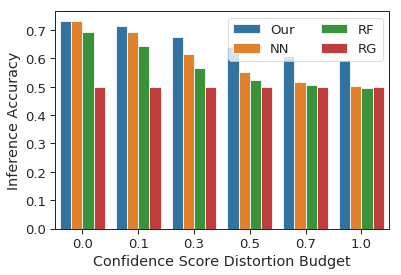

dataset=CH-MNIST defense=MemGuard


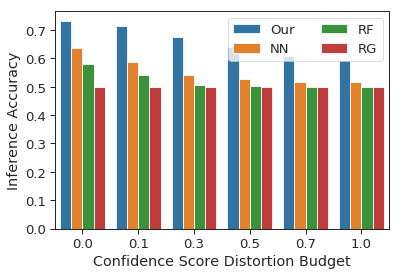

In [5]:
for dataset in ["location","CH-MNIST"]:
    
    for defense in ["MemGuard"]:
        
        print("dataset={} defense={}".format(dataset,defense))

        bar=sns.barplot(x="budget", y="accuracy", hue="attack", 
                       hue_order=["Our","NN","RF","RG"],
                       data=df.loc[ (df['defense'] == defense ) & ( df['dataset'] == dataset ) ],capsize=.05)
        
        
        plt.xlabel('Confidence Score Distortion Budget')
        plt.ylabel('Inference Accuracy')
        plt.legend(ncol=2)
        
        #https://pdfresizer.com/crop
        paper_img_name="{}/main_{}.pdf".format(paper_imgs_dir,dataset)
        plt.savefig(paper_img_name,format="pdf")
        
        plt.show()

In [6]:
#print(df.to_latex())
for dataset in ["location"]:
    result=pd.pivot_table(df.loc[df['dataset'] == dataset],index=["defense","attack"],columns=["budget"],values=["accuracy"])
    result=result.round(2)
    #print(result)
    #print(result.to_latex())

L2 defense

location dataset

In [7]:
df = pd.DataFrame(columns=['attack','defense','e',"accuracy","dataset"])

attack="Our"
defense="L2"
for e,accuracy in zip(
    [0.0,0.010,0.020,0.030,0.040,0.050],     
    [0.6365,0.7225,0.716,0.683,0.5975,0.5275]):
    df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"CH-MNIST"}, ignore_index=True)

attack="RF"
defense="L2"
for e,accuracy in zip(
    [0.0,0.010,0.020,0.030,0.040,0.050],     
    [0.642,0.717,0.719,0.684,0.594,0.5245]):
    df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"CH-MNIST"}, ignore_index=True)

attack="NN"
defense="L2"
for e,accuracy in zip(
    [0.0,0.010,0.020,0.030,0.040,0.050],
    [0.6355,0.7155,0.716,0.6785,0.597,0.529]):
    df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"CH-MNIST"}, ignore_index=True)

attack="RG"
for defense in["L2"]:
    for e,accuracy in zip(
        [0.0,0.010,0.020,0.030,0.040,0.050],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]):
        df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"CH-MNIST"}, ignore_index=True)    

attack="Our"
defense="L2"
for e,accuracy in zip(
    [0.0,0.010,0.020,0.030,0.040,0.050],     
    [0.7295,0.6005,0.501,0.5,0.5,0.5]):
    df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)

attack="RF"
defense="L2"
for e,accuracy in zip(
    [0.0,0.010,0.020,0.030,0.040,0.050],     
    [0.7295,0.5995,0.501,0.5,0.5,0.5]):
    df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)

attack="NN"
defense="L2"
for e,accuracy in zip(
    [0.0,0.010,0.020,0.030,0.040,0.050],
    [0.73,0.6,0.501,0.5,0.5,0.5]):
    df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)
    
    
attack="RG"
for defense in["L2"]:
    for e,accuracy in zip(
        [0.0,0.010,0.020,0.030,0.040,0.050],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]):
        df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)

dataset=location defense=L2


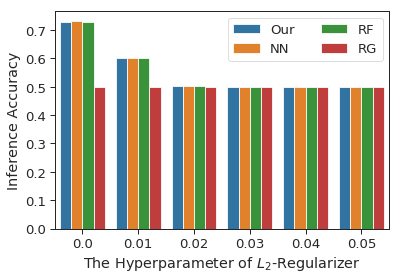

dataset=CH-MNIST defense=L2


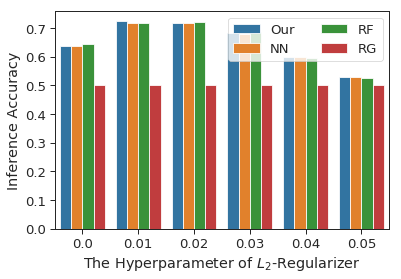

In [8]:
for dataset in ["location","CH-MNIST"]:
#for dataset in ["CH-MNIST"]:
    
    for defense in ["L2"]:
        
        print("dataset={} defense={}".format(dataset,defense))

        bar=sns.barplot(x="e", y="accuracy", hue="attack", 
                       hue_order=["Our","NN","RF","RG"],
                       data=df.loc[ (df['defense'] == defense ) & ( df['dataset'] == dataset ) ],capsize=.05)
        
        
        plt.xlabel('The Hyperparameter of $L_2$-Regularizer')
        plt.ylabel('Inference Accuracy')
        
        plt.legend(ncol=2)
        
        #https://pdfresizer.com/crop
        paper_img_name="{}/main2_{}.pdf".format(paper_imgs_dir,dataset)
        plt.savefig(paper_img_name,format="pdf")
        
        plt.show()
        
        

dropout defense

location dataset

In [9]:
df = pd.DataFrame(columns=['attack','defense','e',"accuracy","dataset"])

attack="Our"
defense="dropout"
for e,accuracy in zip(
    [0.0,0.2,0.4,0.6,0.8,1.0],     
    [0.642,0.6315,0.6495,0.6415,0.645,0.6375]):
    df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"CH-MNIST"}, ignore_index=True)

attack="RF"
defense="dropout"
for e,accuracy in zip(
    [0.0,0.2,0.4,0.6,0.8,1.0],     
    [0.6345,0.636,0.643,0.6405,0.6505,0.631]):
    df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"CH-MNIST"}, ignore_index=True)

attack="NN"
defense="dropout"
for e,accuracy in zip(
    [0.0,0.2,0.4,0.6,0.8,1.0],
    [0.6365,0.638,0.6595,0.644,0.6445,0.6365]):
    df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"CH-MNIST"}, ignore_index=True)

attack="RG"
for defense in["dropout"]:
    for e,accuracy in zip(
        [0.0,0.2,0.4,0.6,0.8,1.0],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]):
        df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"CH-MNIST"}, ignore_index=True)    

attack="Our"
defense="dropout"
for e,accuracy in zip(
    [0.0,0.2,0.4,0.6,0.8,1.0],     
    [0.7295,0.7585,0.779,0.8015,0.7305,0.73]):
    df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)

attack="RF"
defense="dropout"
for e,accuracy in zip(
    [0.0,0.2,0.4,0.6,0.8,1.0],     
    [0.7295,0.5995,0.501,0.5,0.5,0.5]):
    df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)

attack="NN"
defense="dropout"
for e,accuracy in zip(
    [0.0,0.2,0.4,0.6,0.8,1.0],
    [0.7295,0.759,0.7775,0.7985,0.7295,0.73]):
    df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)
    
    
attack="RG"
for defense in["dropout"]:
    for e,accuracy in zip(
        [0.0,0.2,0.4,0.6,0.8,1.0],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]):
        df = df.append({'attack': attack,'defense':defense,"e":e,"accuracy":accuracy,"dataset":"location"}, ignore_index=True)

dataset=location defense=dropout


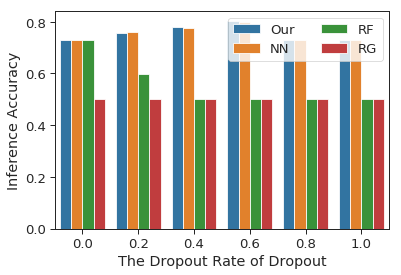

dataset=CH-MNIST defense=dropout


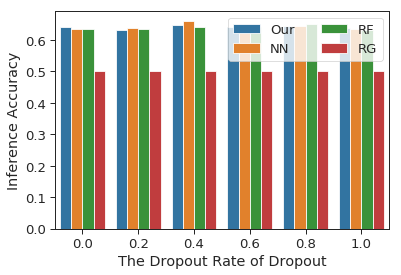

In [10]:
for dataset in ["location","CH-MNIST"]:
    
    for defense in ["dropout"]:
        
        print("dataset={} defense={}".format(dataset,defense))

        bar=sns.barplot(x="e", y="accuracy", hue="attack", 
                       hue_order=["Our","NN","RF","RG"],
                       data=df.loc[ (df['defense'] == defense ) & ( df['dataset'] == dataset ) ],capsize=.05)
        
        
        plt.xlabel('The Dropout Rate of Dropout')
        plt.ylabel('Inference Accuracy')
        #plt.title("Defense is {}".format(defense))
        #plt.title("Dataset is {}".format(dataset))
        plt.legend(ncol=2)
        
        #https://pdfresizer.com/crop
        paper_img_name="{}/dropout_{}.pdf".format(paper_imgs_dir,dataset)
        plt.savefig(paper_img_name,format="pdf")
        
        plt.show()

compare topN of our attack

In [11]:
df = pd.DataFrame(columns=['attack','defense','budget',"accuracy","k","dataset"])

attack="Our"
defense="MemGuard"
dataset="location"

topn=1
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.6298707795448275, 0.6431452385978713, 0.6590267784333376, 0.675016067060003, 0.6910053556866682, 0.699]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"k":topn,"dataset":dataset}, ignore_index=True)

    
topn=2
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.5928707795448276, 0.6079179955433318, 0.6391984806700916, 0.6765190884020552, 0.7138396961340181, 0.7325]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"k":topn,"dataset":dataset}, ignore_index=True)  
    
topn=3
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.5923707795448275, 0.607417995543332, 0.6389657219368563, 0.6757794331621142, 0.7125931443873711, 0.731]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"k":topn,"dataset":dataset}, ignore_index=True)    

topn=5
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.5943707795448275, 0.6094179955433318, 0.640638648379236, 0.6763831890275418, 0.7121277296758471, 0.73]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"k":topn,"dataset":dataset}, ignore_index=True)
    
#topn=10
#for budget,accuracy in zip(
#    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
#    [0.5953707795448275, 0.6104179955433318, 0.6414652663221851, 0.6768791597933113, 0.7122930532644369, 0.73]):
#    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"k":topn,"dataset":dataset}, ignore_index=True)    

topn="N"
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.5008707795448275, 0.5159399027192515, 0.5511101224687633, 0.6148382650562374, 0.6916127550187453, 0.73]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"k":topn,"dataset":dataset}, ignore_index=True) 

In [12]:
attack="Our"
defense="MemGuard"
dataset="CH-MNIST"

topn=1
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.547, 0.5483088299093336, 0.5549700793610348, 0.5701187432443994, 0.60811518369615, 0.637]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"k":topn,"dataset":dataset}, ignore_index=True)

    
topn=2
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.525, 0.5274744591662759, 0.5366429196033553, 0.5553794099123478, 0.6002955754985957, 0.638]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"k":topn,"dataset":dataset}, ignore_index=True)  
    
topn=3
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.53, 0.5316699968837992, 0.5395104090850902, 0.5566999036013889, 0.5999645980657003, 0.637]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"k":topn,"dataset":dataset}, ignore_index=True)    

topn=5
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.531, 0.5326699968837992, 0.5404550276625397, 0.5574666747478585, 0.6005535217811901, 0.6375]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"k":topn,"dataset":dataset}, ignore_index=True)
    
topn="N"
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.516, 0.5176699968837996, 0.5254550276625396, 0.5424666747478585, 0.5857479859365645, 0.6375]):
    df = df.append({'attack': attack,'defense':defense,"budget":budget,"accuracy":accuracy,"k":topn,"dataset":dataset}, ignore_index=True) 

location


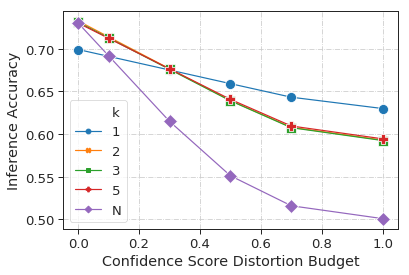

CH-MNIST


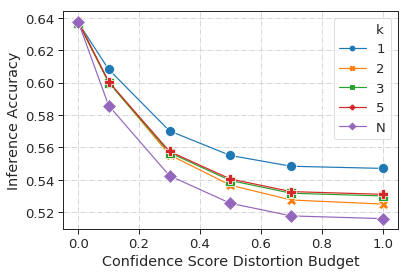

In [13]:


for dataset in ["location","CH-MNIST"]:
    print(dataset)
    sns.lineplot(x="budget", y="accuracy", hue="k",  
                 data=df.loc[  df['dataset'] == dataset ], ci=None,markers=True,
                 dashes=False,markersize=10,style="k",legend="brief")
    plt.legend(ncol=1)
    plt.grid(linestyle='-.')
    plt.xlabel('Confidence Score Distortion Budget')
    plt.ylabel('Inference Accuracy')
    
    
    #https://pdfresizer.com/crop
    paper_img_name="{}/topk_{}.pdf".format(paper_imgs_dir,dataset)
    plt.savefig(paper_img_name,format="pdf")
    plt.show()

Distribution of the normalized entropy of the confidence score vectors for members and non-members of the target classifier

If True, the first element of the return tuple will be the counts normalized to form a probability density, i.e., the area (or integral) under the histogram will sum to 1. This is achieved by dividing the count by the number of observations times the bin width and not dividing by the total number of observations. If stacked is also True, the sum of the histograms is normalized to 1.

Impact of attack classifiers

In [14]:
df = pd.DataFrame(columns=['attack','defense','budget',"accuracy","H","dataset"])

attack="Our"
defense="MemGuard"
dataset="CH-MNIST"

H=2
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.5265, 0.5289744591662757, 0.5381429196033553, 0.5568794099123477, 0.6013689624270926, 0.6365]):
    df = df.append({'attack': attack,'defense':defense,
                    "budget":budget,"accuracy":accuracy,"H":H,"dataset":dataset}, ignore_index=True)

H=3
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.531, 0.5326699968837992, 0.5404550276625397, 0.5574666747478585, 0.6005535217811901, 0.6375]):
    df = df.append({'attack': attack,'defense':defense,
                    "budget":budget,"accuracy":accuracy,"H":H,"dataset":dataset}, ignore_index=True)  

H=4
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.54, 0.5413409211352145, 0.5480713170620901, 0.5631483030596063, 0.6035149035628429, 0.639]):
    df = df.append({'attack': attack,'defense':defense,
                    "budget":budget,"accuracy":accuracy,"H":H,"dataset":dataset}, ignore_index=True)
H=5
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.547, 0.5480413781580227, 0.5540215253016312, 0.5681496108087574, 0.6061993454629965, 0.64]):
    df = df.append({'attack': attack,'defense':defense,
                    "budget":budget,"accuracy":accuracy,"H":H,"dataset":dataset}, ignore_index=True)    
    
dataset="Location"

H=2
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.6088707795448275, 0.623939902719252, 0.6526823680917714, 0.6830094208550631, 0.7133364736183544, 0.7285]):
    df = df.append({'attack': attack,'defense':defense,
                    "budget":budget,"accuracy":accuracy,"H":H,"dataset":dataset}, ignore_index=True)

H=3
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.5948707795448276, 0.6099179955433318, 0.6410537511037823, 0.6766322506622696, 0.7122107502207564, 0.73]):
    df = df.append({'attack': attack,'defense':defense,
                    "budget":budget,"accuracy":accuracy,"H":H,"dataset":dataset}, ignore_index=True)  
    
H=4
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.5913707795448275, 0.6064179955433319, 0.6380427185002415, 0.6758256311001453, 0.7136085437000481, 0.7325]):
    df = df.append({'attack': attack,'defense':defense,
                    "budget":budget,"accuracy":accuracy,"H":H,"dataset":dataset}, ignore_index=True)
    
H=5
for budget,accuracy in zip(
    [1.0, 0.7, 0.5, 0.3, 0.1, 0.0],     
    [0.5883707795448275, 0.6034179955433319, 0.635564667945602, 0.6749357768799907, 0.7143119256266632, 0.734]):
    df = df.append({'attack': attack,'defense':defense,
                    "budget":budget,"accuracy":accuracy,"H":H,"dataset":dataset}, ignore_index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
attack      48 non-null object
defense     48 non-null object
budget      48 non-null float64
accuracy    48 non-null float64
H           48 non-null int64
dataset     48 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ KB
None
   attack   defense  budget  accuracy  H   dataset
0     Our  MemGuard     1.0  0.526500  2  CH-MNIST
1     Our  MemGuard     0.7  0.528974  2  CH-MNIST
2     Our  MemGuard     0.5  0.538143  2  CH-MNIST
3     Our  MemGuard     0.3  0.556879  2  CH-MNIST
4     Our  MemGuard     0.1  0.601369  2  CH-MNIST
5     Our  MemGuard     0.0  0.636500  2  CH-MNIST
6     Our  MemGuard     1.0  0.531000  3  CH-MNIST
7     Our  MemGuard     0.7  0.532670  3  CH-MNIST
8     Our  MemGuard     0.5  0.540455  3  CH-MNIST
9     Our  MemGuard     0.3  0.557467  3  CH-MNIST
10    Our  MemGuard     0.1  0.600554  3  CH-MNIST
11    Our  MemGuard     0.0  0.6

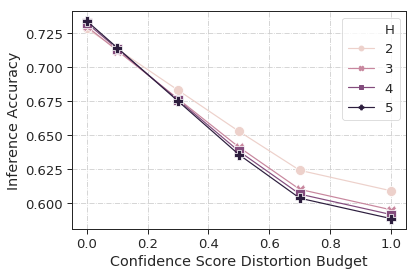

CH-MNIST


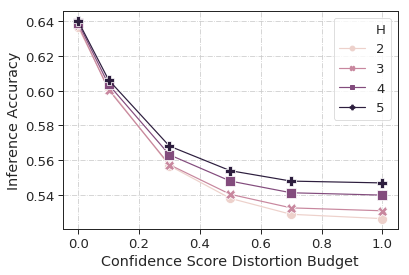

In [15]:
df["H"]=df["H"].astype(int)
#df["H"]=df["H"].astype(str)
print(df.info())
print(df)

for dataset in ["Location","CH-MNIST"]:
    print(dataset)
    sns.lineplot(x="budget", y="accuracy", hue="H",  
                 data=df.loc[  df['dataset'] == dataset ], ci=None,markers=True,
                 dashes=False,markersize=10,style="H",legend="brief")
    plt.legend(ncol=1)
    plt.grid(linestyle='-.')
    plt.xlabel('Confidence Score Distortion Budget')
    plt.ylabel('Inference Accuracy')
    
    
    #https://pdfresizer.com/crop
    paper_img_name="{}/H_{}.pdf".format(paper_imgs_dir,dataset)
    plt.savefig(paper_img_name,format="pdf",bbox_inches="tight",dpi=600)
    plt.show()